# Computer vision - Week_08 - Morphological operations

In [1]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt
from skimage.draw import rectangle
from skimage.morphology import disk
from skimage import morphology
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

Morphological operations form a fundamental aspect of image processing in computer vision, playing a pivotal role in tasks such as noise reduction, object extraction, and feature enhancement. In this section, we will delve into the basic principles of morphological operations, exploring key concepts including dilation, erosion, opening, and closing.

Structuring Elements:
Understanding the role of structuring elements is crucial for effective application of morphological operations. A structuring element defines the neighborhood relationships used by operations like dilation and erosion. It is typically a small, binary-valued matrix that determines the behavior of the operation.

Dilation:
Dilation is a morphological operation that expands the boundaries of objects within an image. By sliding a structuring element across the image, pixels within the element's footprint are set to 1 if at least one pixel in the footprint is 1.

Erosion:
Conversely, erosion is a morphological operation that contracts the boundaries of objects. Pixels within the footprint of the structuring element are set to 1 only if all pixels in the footprint are 1.

Opening:
Opening is a composite morphological operation that involves combining erosion followed by dilation. This process is particularly effective for noise reduction and separating closely spaced objects. Opening helps in smoothing object boundaries and breaking narrow isthmuses between objects.

Closing:
Closing is another composite morphological operation that consists of dilation followed by erosion. It is employed to close small gaps or narrow breaks between objects. Closing is useful in completing object contours and making objects more compact.


Also check:

[Another examples OpenCV - Preprocessing with Computer Vision Part VII: Morphological Operations](https://medium.com/perspectivesondatascience/preprocessing-with-computer-vision-part-vii-morphological-operations-ca850a701ea8)

[Understanding Morphological Image Processing and Its Operations](https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756)

## Own implementation
### Create "fake" mask

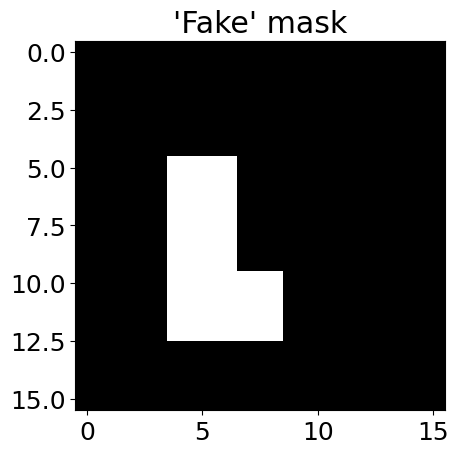

In [2]:
# Create a boolean mask I with dimensions 16x16 initialized to False
fake_mask = np.zeros((16, 16), dtype=np.bool_)

# Draw two rectangles on the boolean mask I
rectangles = [(5, 4, 5, 3), (10, 4, 3, 5)]
for rect_params in rectangles:
    rr, cc = rectangle(start=(rect_params[0], rect_params[1]), extent=(rect_params[2], rect_params[3]), shape=fake_mask.shape)
    fake_mask[rr, cc] = True

# # Create a boolean mask I with dimensions 16x16 initialized to False
# I = np.zeros((16, 16), dtype=np.bool)
# # Draw a rectangle at the specified location (5, 4) with extent (5, 3)
# rr, cc = rectangle((5, 4), extent=(5, 3), shape=I.shape)
# # Set the pixels inside the rectangle to True in the boolean mask I
# I[rr, cc] = True
# # Draw another rectangle at the specified location (10, 4) with extent (3, 5)
# rr, cc = rectangle((10, 4), extent=(3, 5), shape=I.shape)
# # Set the pixels inside the second rectangle to True in the boolean mask I
# I[rr, cc] = True
# # Backup the original mask (optional)
# backup = I.copy()

# Display the boolean mask using matplotlib
plt.imshow(fake_mask, cmap='gray')
plt.title("'Fake' mask")
plt.show()

### Create structural element

[[1 0]
 [1 0]
 [1 1]]


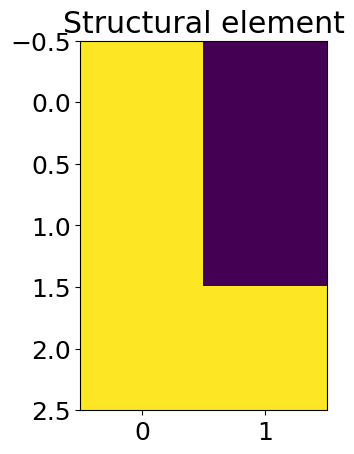

In [3]:
structural_element = np.array([[1, 0],[1, 0],[1, 1]])
print(structural_element)
plt.imshow(structural_element)
plt.title("Structural element")
plt.show()

### Padding of mask

In [4]:
seps = np.array([structural_element.shape[1], 0]) # structural_element_pad_size
print(seps)

[2 0]


Top bottom padding during morphological operations is necessary

In [5]:
fake_mask_after_pad = np.pad(fake_mask,
                   ((seps[0], seps[0]),(seps[1],seps[1])),
                   mode='constant',
                   constant_values=((False, False), (False, False)))

Text(0.5, 1.0, 'Fake mask after padding')

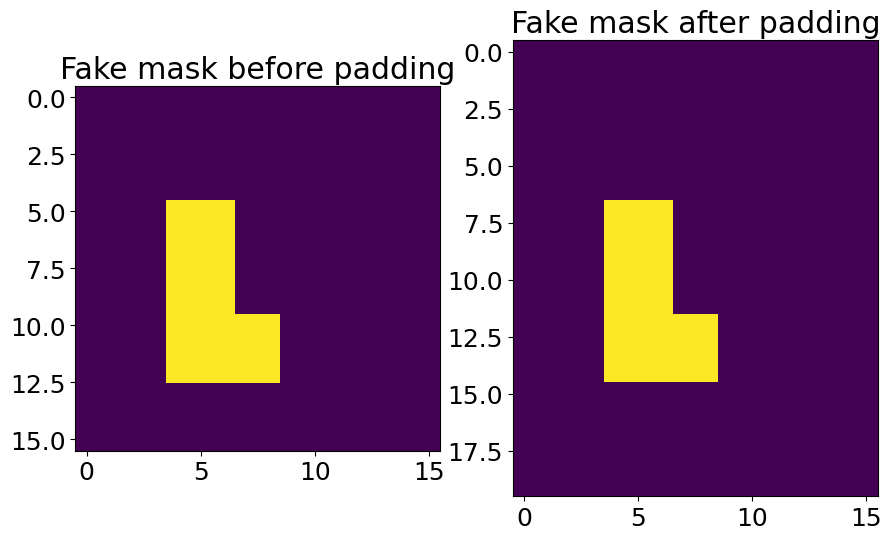

In [6]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(fake_mask)
plt.title("Fake mask before padding")
plt.subplot(132)
plt.imshow(fake_mask_after_pad)
plt.title("Fake mask after padding")

### Iterate over mask and apply operations

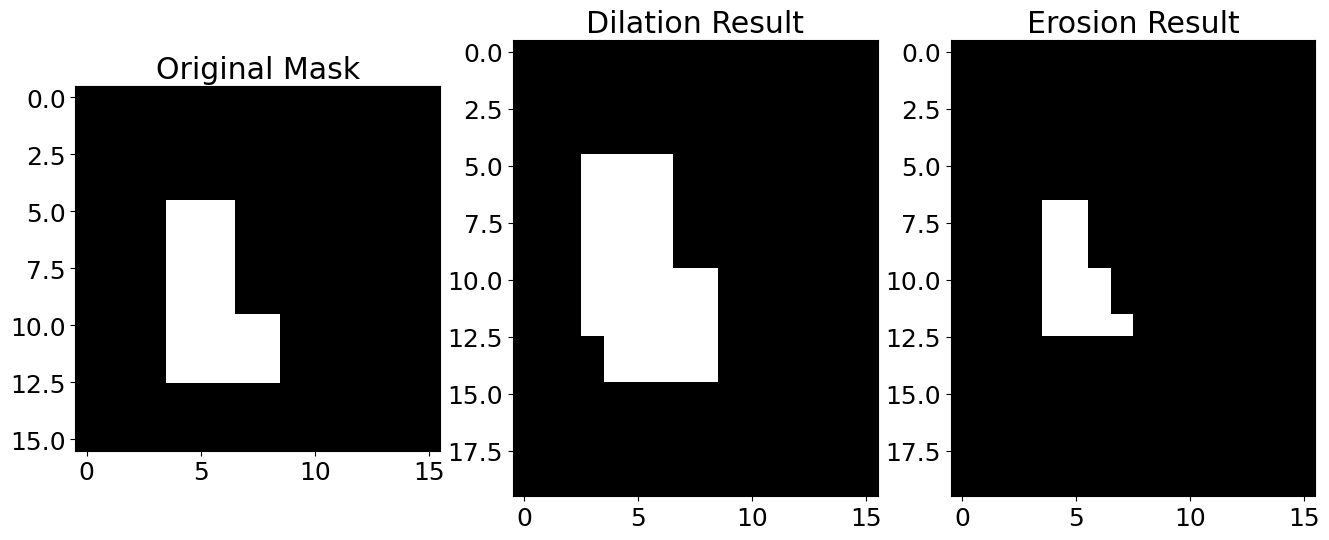

In [7]:
# Initialize arrays to store the results of erosion and dilation
eroded_fake_mask = np.zeros_like(fake_mask_after_pad, dtype=np.bool_)
dilated_fake_mask = np.zeros_like(fake_mask_after_pad, dtype=np.bool_)

# Iterate over the pixels in the fact_mask excluding the borders
for i in range(seps[0], fake_mask_after_pad.shape[0] - seps[0]):
    for j in range(seps[1], fake_mask_after_pad.shape[1] - seps[1]):
        # Crop a region around the current pixel based on the SE
        crop = fake_mask_after_pad[i - seps[0]: i - seps[0] + structural_element.shape[0], j - seps[1]:j - seps[1] + structural_element.shape[1]]

        # Perform logical AND operation between the crop and the SE
        and_result = np.logical_and(crop, structural_element)

        # Perform erosion test: all pixels in SE are True
        erosion_test = np.sum(and_result) == np.sum(structural_element)

        # Perform dilation test: at least one pixel in SE is True
        dilation_test = np.sum(and_result) > 0

        # Update the results in the eroded and dilated masks
        dilated_fake_mask[i - seps[0], j - seps[1]] = dilation_test
        eroded_fake_mask[i - seps[0], j - seps[1]] = erosion_test

# Plot the original mask, dilated mask, and eroded mask
plt.figure(figsize=(16, 10))
plt.subplot(131)
plt.imshow(fake_mask, cmap='gray')
plt.title("Original Mask")

plt.subplot(132)
plt.imshow(dilated_fake_mask, cmap='gray')
plt.title("Dilation Result")

plt.subplot(133)
plt.imshow(eroded_fake_mask, cmap='gray')
plt.title("Erosion Result")

plt.show()

## Build in methodsm

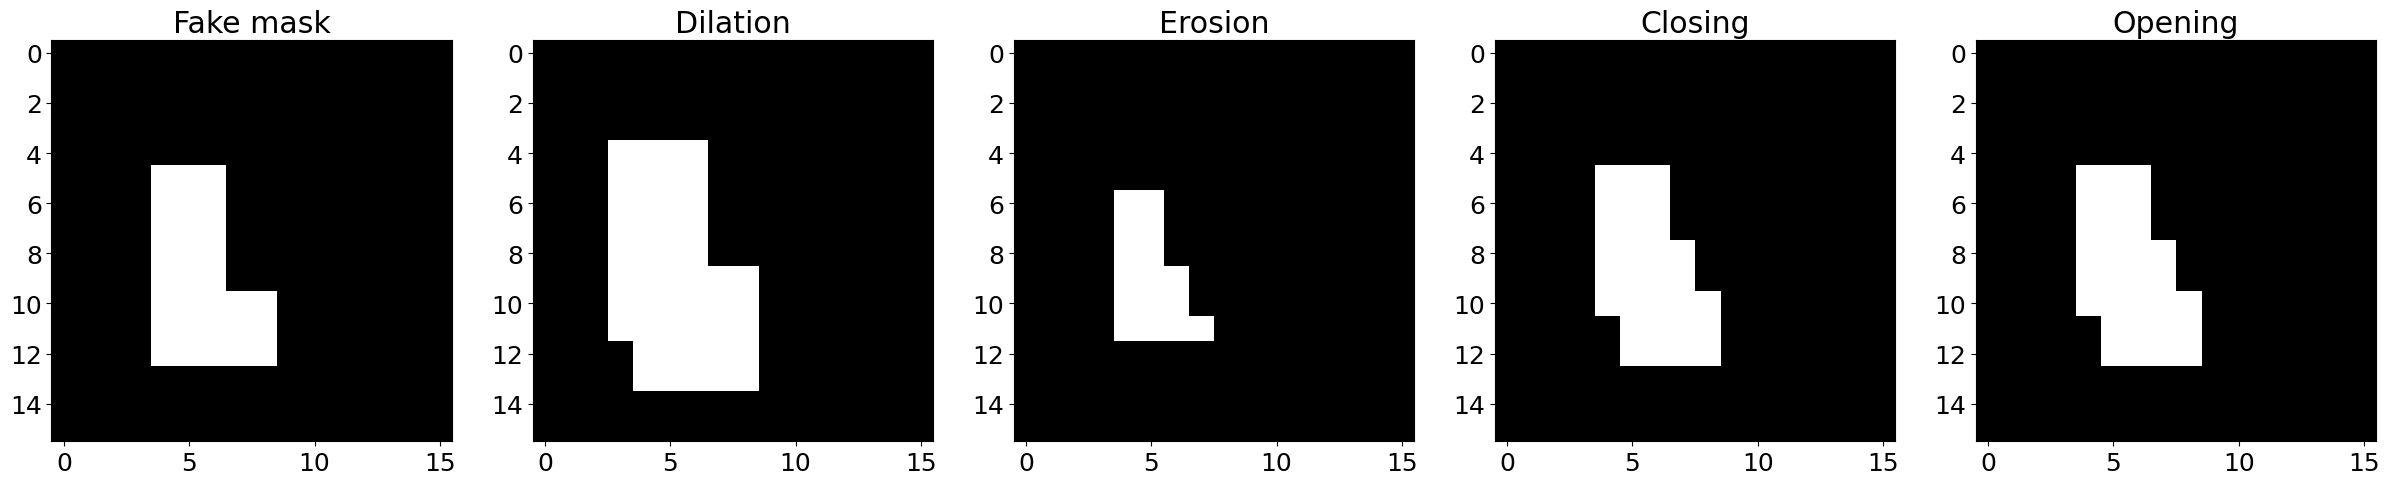

In [8]:
# Perform dilation operation using morphology.dilation
dilated_I = morphology.dilation(fake_mask, structural_element)

# Perform erosion operation using morphology.erosion
eroded_I = morphology.erosion(fake_mask, structural_element)

# Perform closing operation using morphology.closing
closed_I = morphology.closing(fake_mask, structural_element)

# Perform opening operation using morphology.opening
open_I = morphology.opening(fake_mask, structural_element)

# Display the results using matplotlib
plt.figure(figsize=(30, 20))

plt.subplot(151)
plt.imshow(fake_mask, cmap='gray')
plt.title("Fake mask")

plt.subplot(152)
plt.imshow(dilated_I, cmap='gray')
plt.title("Dilation")

plt.subplot(153)
plt.imshow(eroded_I, cmap='gray')
plt.title("Erosion")

plt.subplot(154)
plt.imshow(closed_I, cmap='gray')
plt.title("Closing")

plt.subplot(155)
plt.imshow(open_I, cmap='gray')
plt.title("Opening")

plt.show()

## Real world problem
### Get mask from RGB image
Segmentation process and parameters is not same for all cases :) For more look into 03_image_segmentation

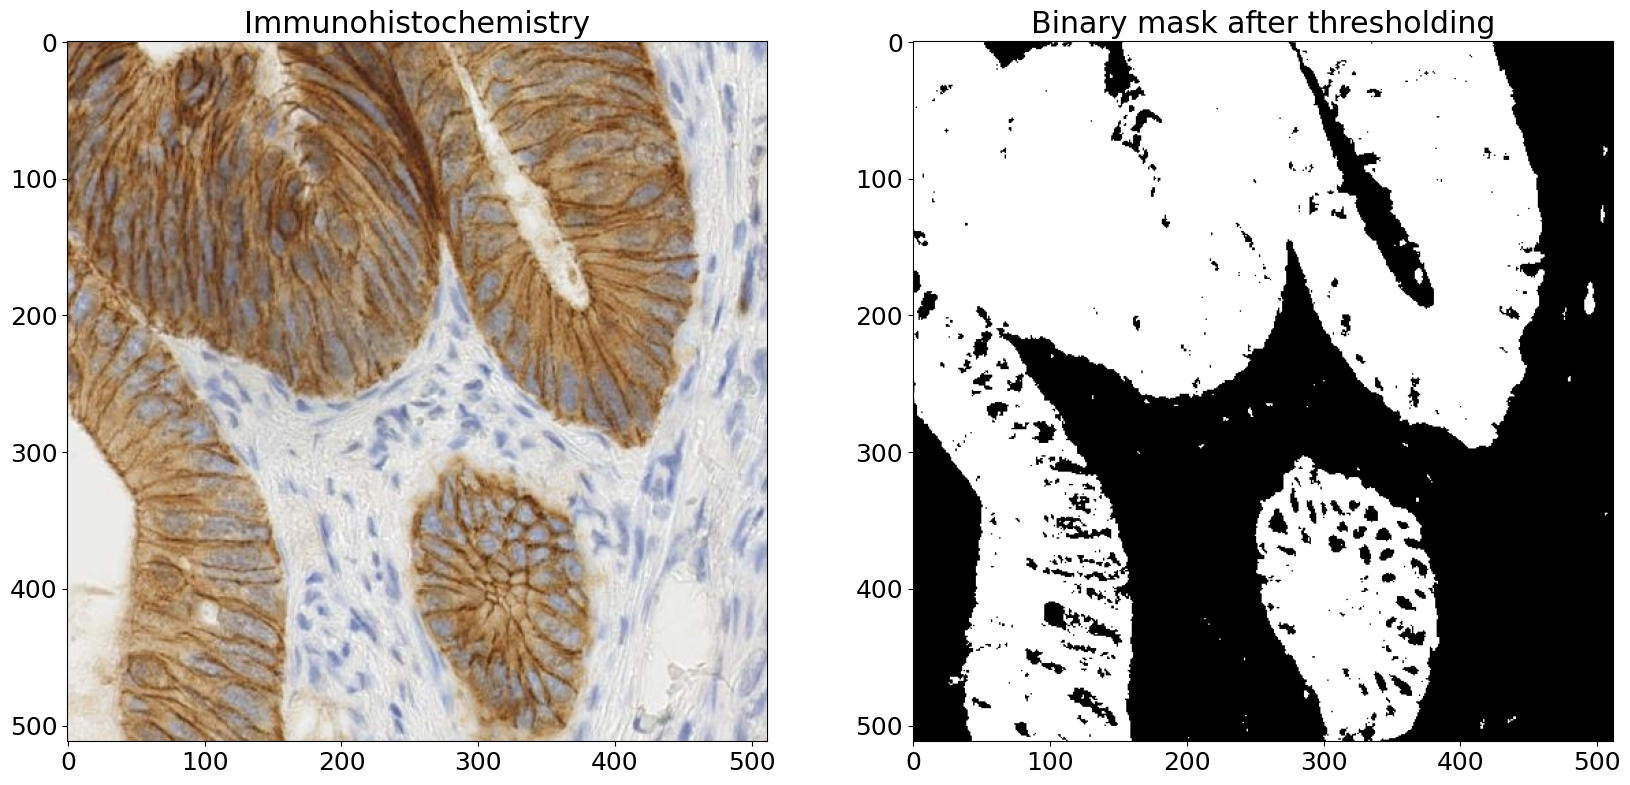

In [9]:
# Section 1: Load Image
# Load the immunohistochemistry image from skimage
rgb_image = data.immunohistochemistry()

# Display the original immunohistochemistry image
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Immunohistochemistry')

# Section 2: Extract Blue Channel
# While the blue channel can often contain relevant information or dominant features in certain images, this choice may not hold true for all cases. The selection of the optimal channel for effective thresholding depends on the unique characteristics of the images and the specific requirements of the image processing task.
# Extract the blue channel from the image
blue_channel = rgb_image[:, :, 2]

# Section 3: Apply Otsu's Thresholding
# Apply Otsu's thresholding to the blue channel
threshold_value = filters.threshold_otsu(blue_channel)

# Section 4: Create Binary Mask
# Create a binary mask based on the threshold
binary_mask = blue_channel < threshold_value


# Display the binary mask obtained from Otsu's thresholding
plt.subplot(222)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary mask after thresholding')

# Show the plots
plt.show()

### Apply errosion

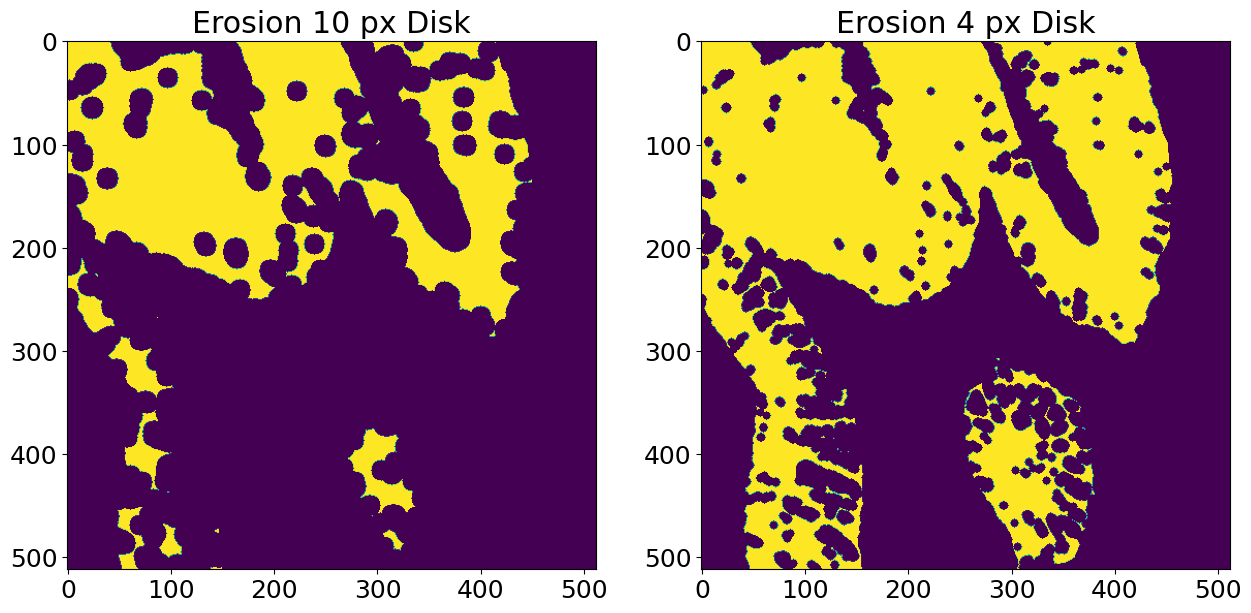

In [10]:
# Create a figure for plotting with a size of 15x10 inches
plt.figure(figsize=(15, 10))

# Subplot 1: Erosion with a 10-pixel disk-shaped structuring element
plt.subplot(121)

# Set the title for the subplot
plt.title('Erosion 10 px Disk')

# Perform erosion on the binary mask using a disk-shaped structuring element with a radius of 10 pixels
erosion_result_10px = morphology.erosion(binary_mask, morphology.disk(10))

# Display the result of the erosion operation
plt.imshow(erosion_result_10px)

# Subplot 2: Erosion with a 4-pixel disk-shaped structuring element
plt.subplot(122)

# Set the title for the subplot
plt.title('Erosion 4 px Disk')

# Perform erosion on the binary mask using a disk-shaped structuring element with a radius of 4 pixels
erosion_result_4px = morphology.erosion(binary_mask, morphology.disk(4))

# Display the result of the erosion operation
plt.imshow(erosion_result_4px)

# Show the plots
plt.show()

### Apply dilatation

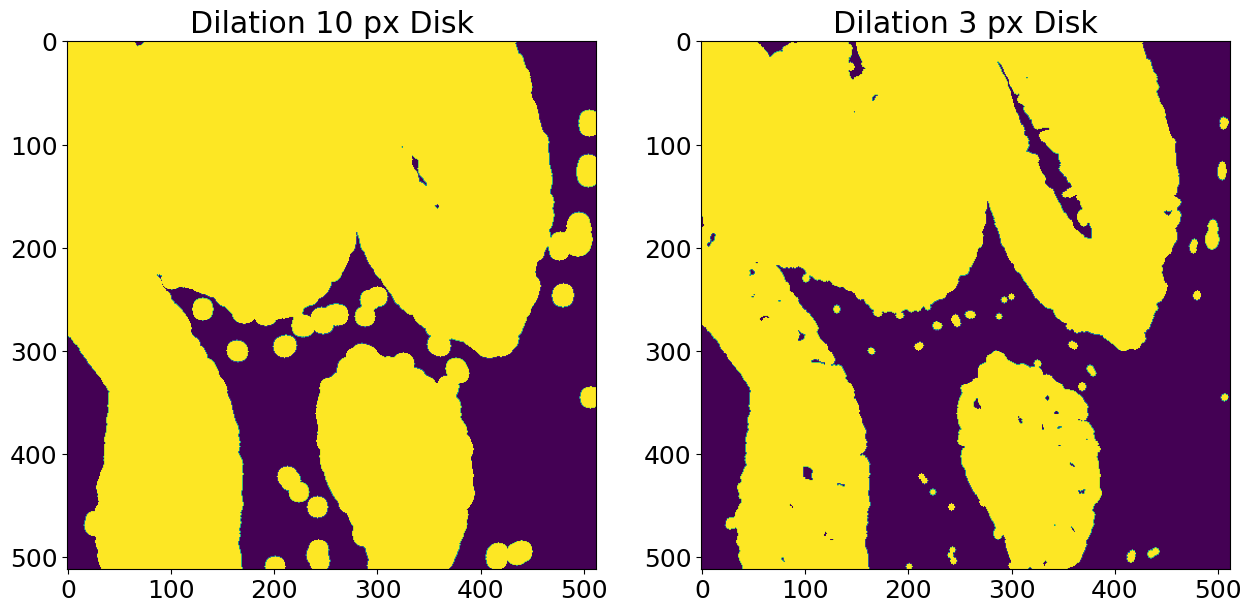

In [11]:
# Create a figure for plotting with a size of 15x10 inches
plt.figure(figsize=(15, 10))

# Subplot 1: Dilation with a 10-pixel disk-shaped structuring element
plt.subplot(121)

# Set the title for the subplot
plt.title('Dilation 10 px Disk')

# Perform dilation on the binary mask using a disk-shaped structuring element with a radius of 10 pixels
dilation_result_10px = morphology.dilation(binary_mask, morphology.disk(10))

# Display the result of the dilation operation
plt.imshow(dilation_result_10px)

# Subplot 2: Dilation with a 3-pixel disk-shaped structuring element
plt.subplot(122)

# Set the title for the subplot
plt.title('Dilation 3 px Disk')

# Perform dilation on the binary mask using a disk-shaped structuring element with a radius of 3 pixels
dilation_result_3px = morphology.dilation(binary_mask, morphology.disk(3))

# Display the result of the dilation operation
plt.imshow(dilation_result_3px)

# Show the plots
plt.show()


### Apply closing

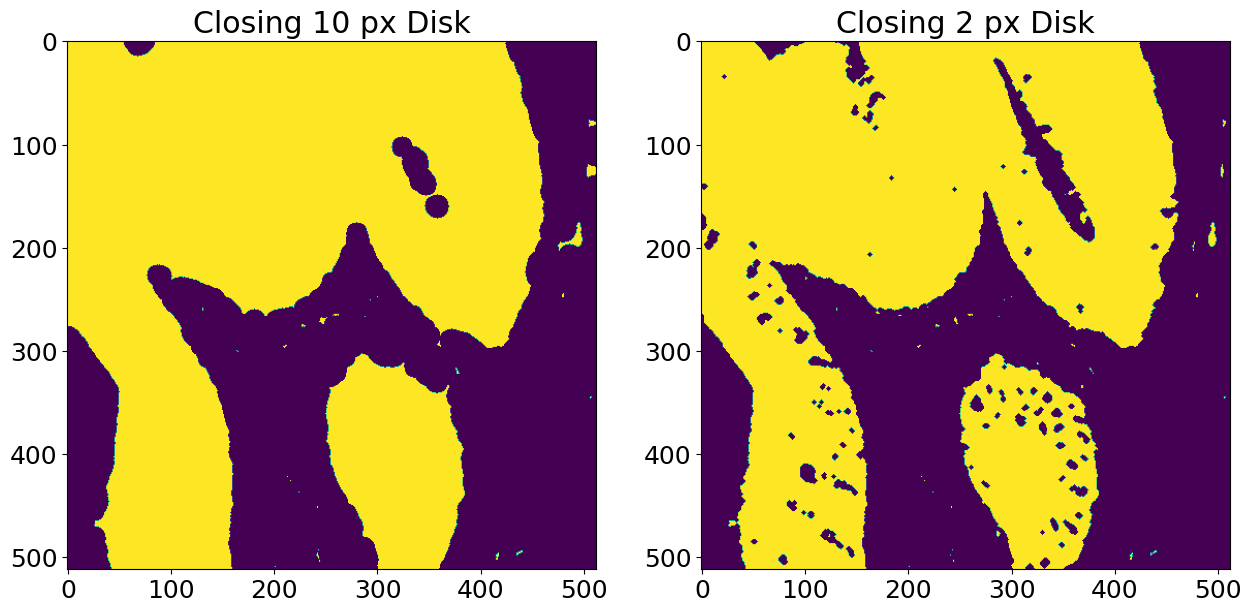

In [12]:
# Create a figure for plotting with a size of 15x10 inches
plt.figure(figsize=(15, 10))

# Subplot 1: Closing with a 10-pixel disk-shaped structuring element
plt.subplot(121)

# Set the title for the subplot
plt.title('Closing 10 px Disk')

# Perform closing on the binary mask using a disk-shaped structuring element with a radius of 10 pixels
closing_result_10px = morphology.closing(binary_mask, morphology.disk(10))

# Display the result of the closing operation
plt.imshow(closing_result_10px)

# Subplot 2: Closing with a 2-pixel disk-shaped structuring element
plt.subplot(122)

# Set the title for the subplot
plt.title('Closing 2 px Disk')

# Perform closing on the binary mask using a disk-shaped structuring element with a radius of 2 pixels
closing_result_2px = morphology.closing(binary_mask, morphology.disk(2))

# Display the result of the closing operation
plt.imshow(closing_result_2px)

# Show the plots
plt.show()

### Apply openning

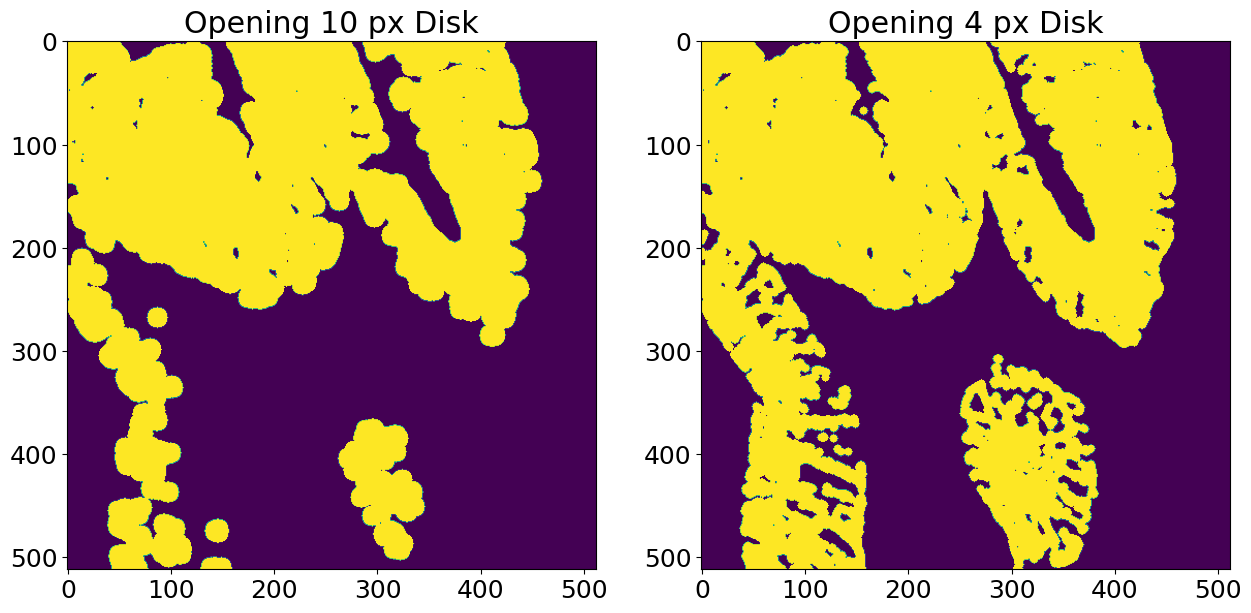

In [13]:
# Create a figure for plotting with a size of 15x10 inches
plt.figure(figsize=(15, 10))

# Subplot 1: Opening with a 10-pixel disk-shaped structuring element
plt.subplot(121)

# Set the title for the subplot
plt.title('Opening 10 px Disk')

# Perform opening on the binary mask using a disk-shaped structuring element with a radius of 10 pixels
opening_result_10px = morphology.opening(binary_mask, morphology.disk(10))

# Display the result of the opening operation
plt.imshow(opening_result_10px)

# Subplot 2: Opening with a 4-pixel disk-shaped structuring element
plt.subplot(122)

# Set the title for the subplot
plt.title('Opening 4 px Disk')

# Perform opening on the binary mask using a disk-shaped structuring element with a radius of 4 pixels
opening_result_4px = morphology.opening(binary_mask, morphology.disk(4))

# Display the result of the opening operation
plt.imshow(opening_result_4px)

# Show the plots
plt.show()


### Try the best

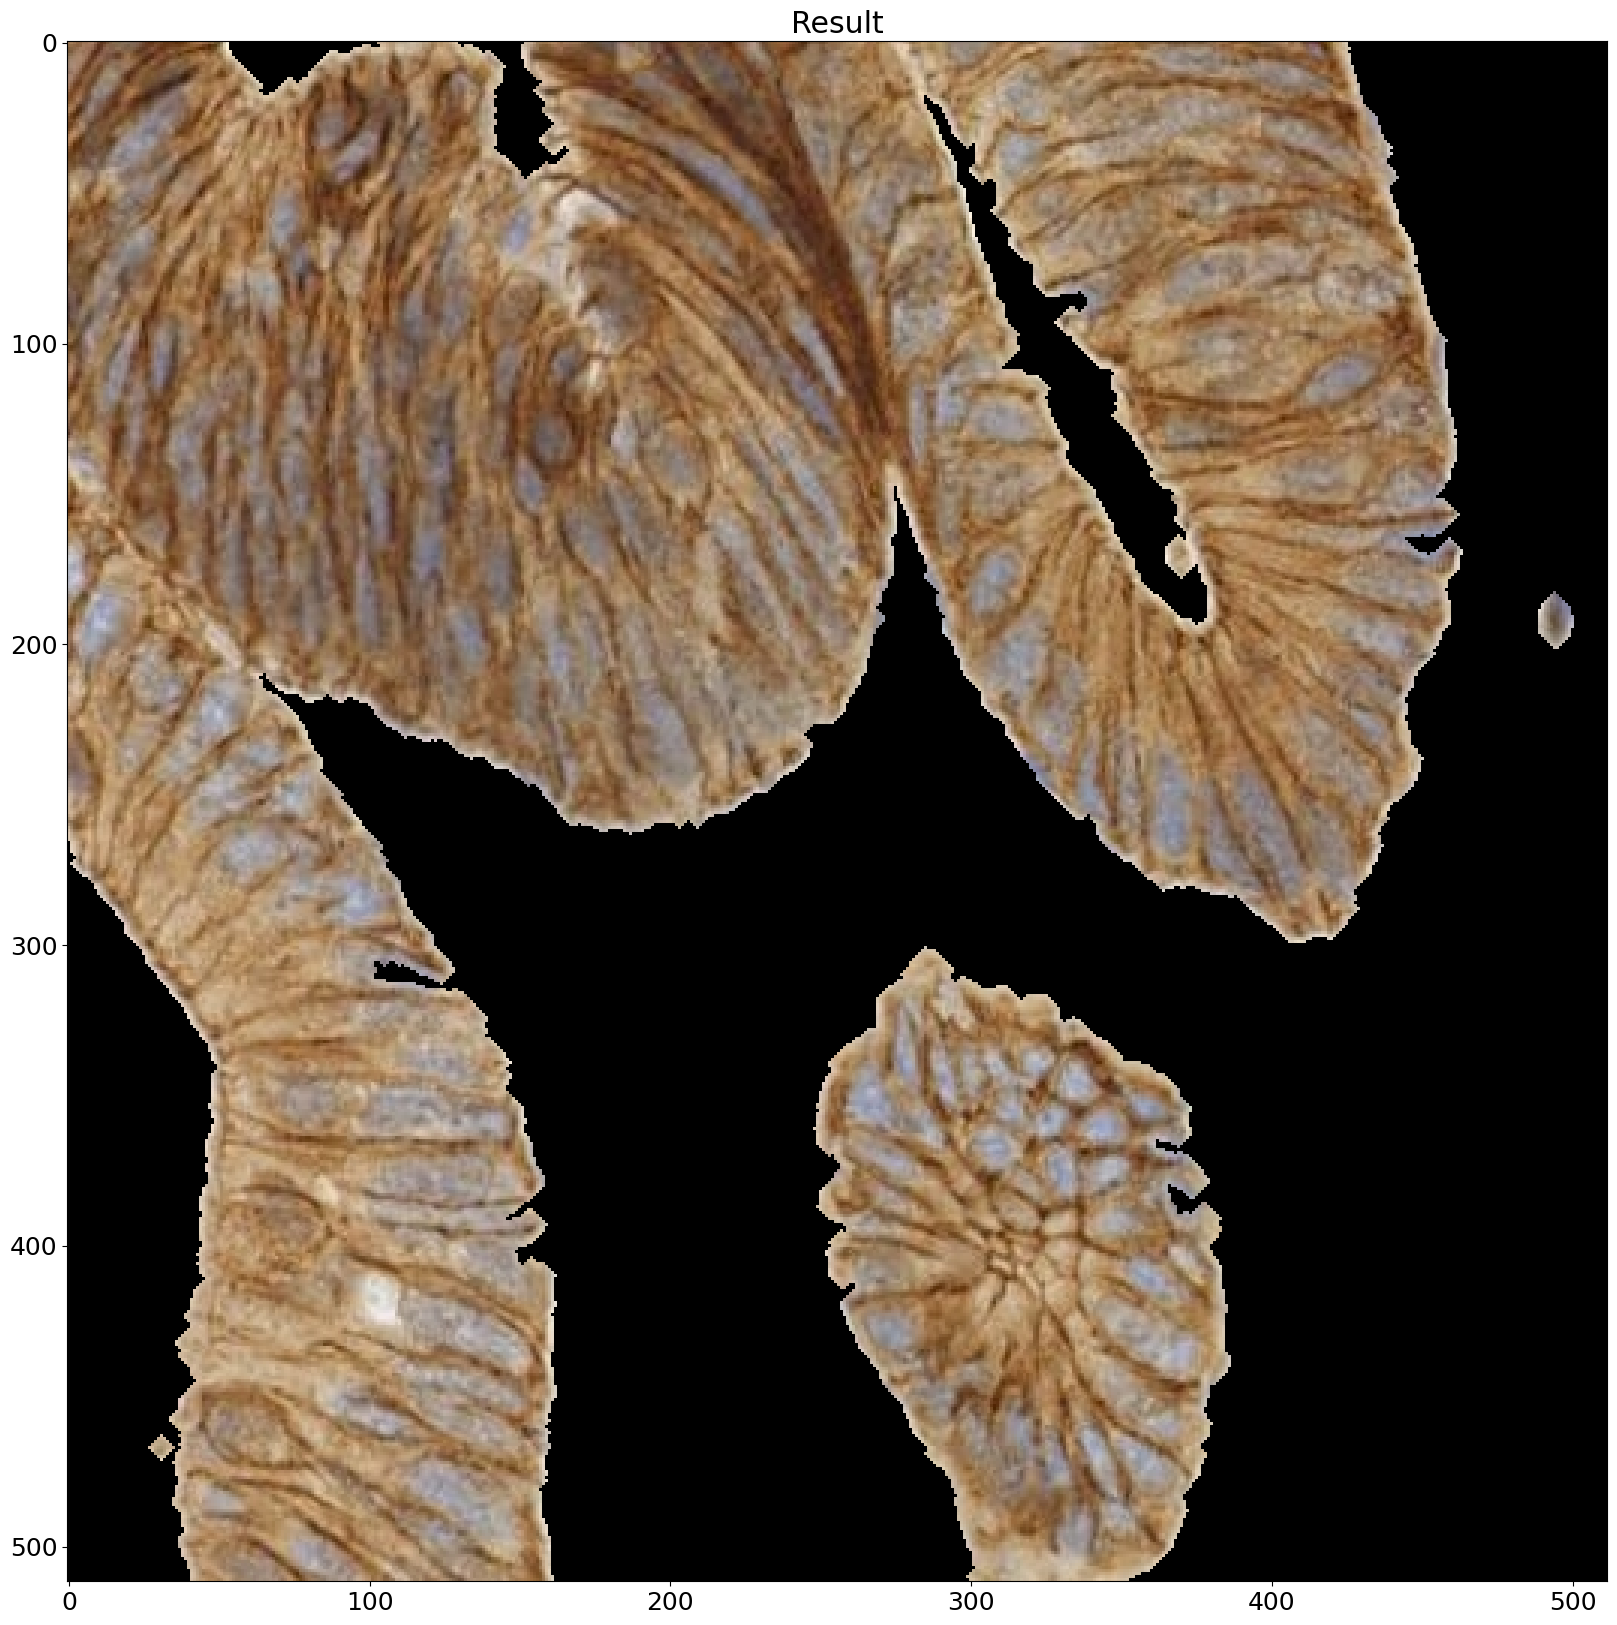

In [14]:
# Create a figure for plotting with a size of 20x20 inches
plt.figure(figsize=(20, 20))

# Morphological operations for final mask processing:
# 1. Perform opening on the binary mask using a 2-pixel disk-shaped structuring element.
# 2. Dilate the result from step 1 using a 2-pixel disk-shaped structuring element.
# 3. Remove small holes from the dilated result using a minimum hole size of 256 pixels.
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(binary_mask, morphology.disk(2)), morphology.disk(2)), 256)

# Display the original immunohistochemistry image multiplied by the final mask.
# The mask is applied to highlight specific areas in the image.
plt.imshow(rgb_image * np.dstack((mask_final, mask_final, mask_final)), cmap='gray')

# Set the title for the plot
plt.title('Result')

# Show the plot
plt.show()

### Try the best but cool

/Users/hlibokymaros/opt/anaconda3/envs/KKUI-PV_2022/lib/python3.9/site-packages/skimage/_shared/utils.py:274: FutureWarning: `selem` is a deprecated argument name for `opening`. It will be removed in version 1.0. Please use `footprint` instead.
  warnings.warn(self.warning_msg.format(
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_7957/2168332139.py:14: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  result = operation(result, **params)


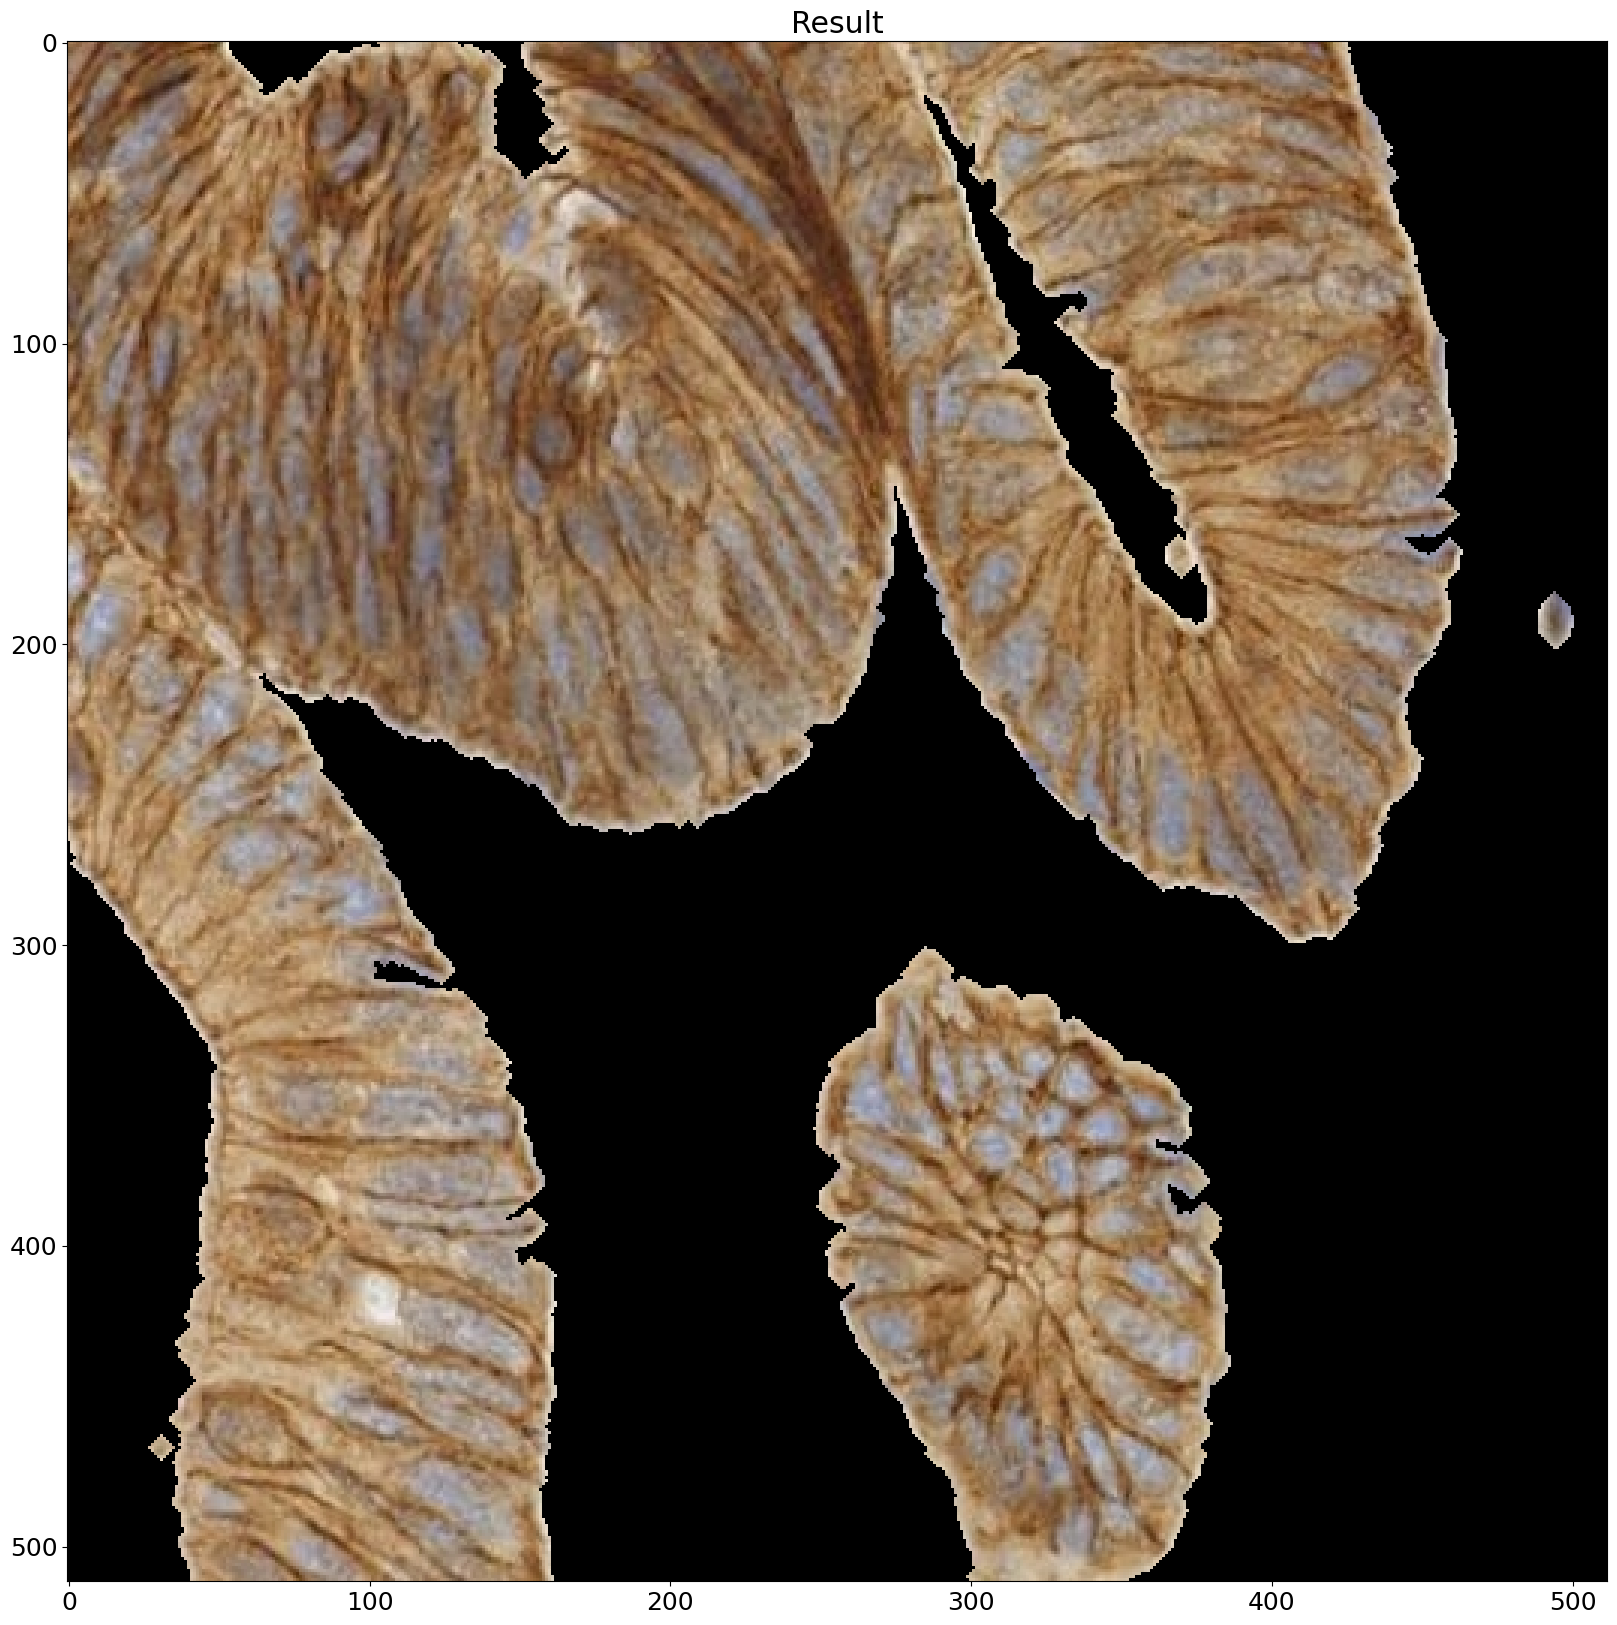

In [15]:

# Define a list of dictionaries, each containing a morphological operation and its parameters
morph_operations_params = [
    {'operation': morphology.opening, 'params': {'selem': morphology.disk(2)}},  # Opening
    # {'operation': morphology.dilation, 'params': {'selem': morphology.disk(2)}},  # Dilation
    {'operation': morphology.dilation, 'params': {'selem': morphology.disk(2)}},  # Additional Dilation
    {'operation': morphology.remove_small_holes, 'params': {'area_threshold': 256}}  # Remove Small Holes
]

# Apply morphological operations sequentially
result = binary_mask.copy()  # Initialize result with the original mask
for operation_params in morph_operations_params:
    operation = operation_params['operation']
    params = operation_params['params']
    result = operation(result, **params)

# Visualization
plt.figure(figsize=(20, 20))
plt.imshow(rgb_image * np.dstack((result, result, result)), cmap='gray')
plt.title('Result')
plt.show()


## Skeleton
As erosion is applied iteratively, it removes pixels from the edges of objects, gradually reducing their thickness and forming a simplified representation known as a "skeleton." The skeleton captures the essential structure or connectivity of the original objects while preserving their overall shape.

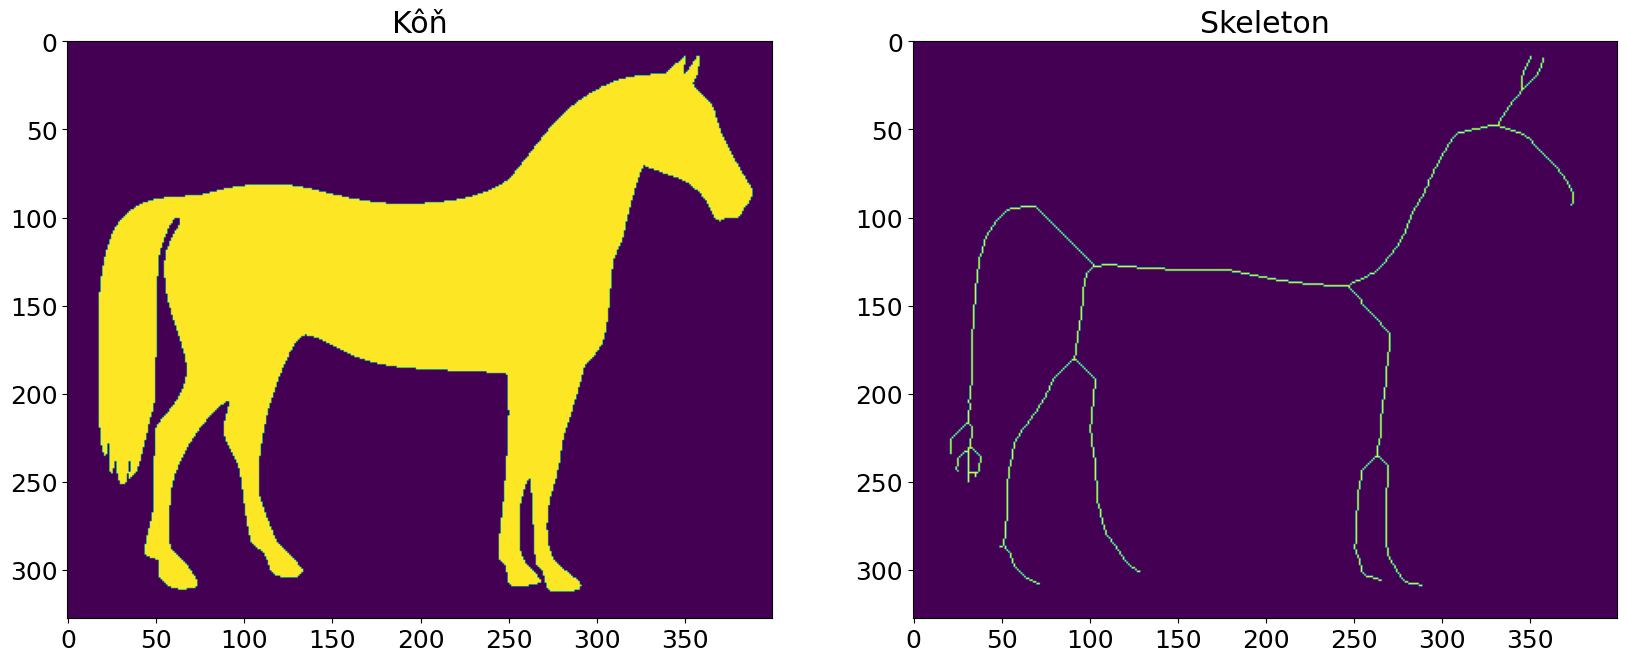

In [16]:
# Create a figure for plotting with a size of 20x15 inches
plt.figure(figsize=(20, 15))

# Load horse mask and invert vales
I = data.horse() == False

# Subplot 1: Original Horse Image
plt.subplot(121)

# Set the title for the subplot
plt.title("Kôň")  # "Kôň" means "Horse" in Slovak

# Display the original horse image
plt.imshow(I)

# Subplot 2: Skeletonized Horse Image
plt.subplot(122)

# Set the title for the subplot
plt.title("Skeleton")  # "Skeleton" in English

# Skeletonize the binary mask of the horse image
skeletonized_image = morphology.skeletonize(I)

# Display the skeletonized horse image
plt.imshow(skeletonized_image)

# Show the plots
plt.show()